https://github.com/SherlockLiao/pytorch-beginner/blob/master/01-Linear%20Regression/Linear_Regression.py

In [2]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

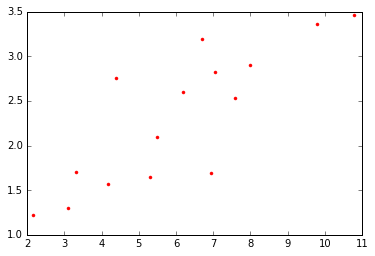

In [6]:

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

plt.plot(x_train, y_train, 'r.')
plt.show()


x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [12]:
help(nn.Linear)

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Applies a linear transformation to the incoming data: :math:`y = Ax + b`
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to False, the layer will not learn an additive bias. Default: True
 |  
 |  Shape:
 |      - Input: :math:`(N, in\_features)`
 |      - Output: :math:`(N, out\_features)`
 |  
 |  Attributes:
 |      weight: the learnable weights of the module of shape (out_features x in_features)
 |      bias:   the learnable bias of the module of shape (out_features)
 |  
 |  Examples::
 |  
 |      >>> m = nn.Linear(20, 30)
 |      >>> input = autograd.Variable(torch.randn(128, 20))
 |      >>> output = m(input)
 |      >>> print(output.size())
 |  
 |  Method resolution order:
 |      Linear
 |      torch.nn.modules.module.Module
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 

In [7]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()

In [8]:
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

Epoch[20/1000], loss: 34.622749
Epoch[40/1000], loss: 24.584074
Epoch[60/1000], loss: 17.489223
Epoch[80/1000], loss: 12.474909
Epoch[100/1000], loss: 8.931002
Epoch[120/1000], loss: 6.426298
Epoch[140/1000], loss: 4.656044
Epoch[160/1000], loss: 3.404861
Epoch[180/1000], loss: 2.520526
Epoch[200/1000], loss: 1.895463
Epoch[220/1000], loss: 1.453635
Epoch[240/1000], loss: 1.141310
Epoch[260/1000], loss: 0.920511
Epoch[280/1000], loss: 0.764395
Epoch[300/1000], loss: 0.653995
Epoch[320/1000], loss: 0.575905
Epoch[340/1000], loss: 0.520649
Epoch[360/1000], loss: 0.481532
Epoch[380/1000], loss: 0.453820
Epoch[400/1000], loss: 0.434169
Epoch[420/1000], loss: 0.420215
Epoch[440/1000], loss: 0.410288
Epoch[460/1000], loss: 0.403206
Epoch[480/1000], loss: 0.398136
Epoch[500/1000], loss: 0.394487
Epoch[520/1000], loss: 0.391843
Epoch[540/1000], loss: 0.389910
Epoch[560/1000], loss: 0.388478
Epoch[580/1000], loss: 0.387401
Epoch[600/1000], loss: 0.386575
Epoch[620/1000], loss: 0.385926
Epoch[64

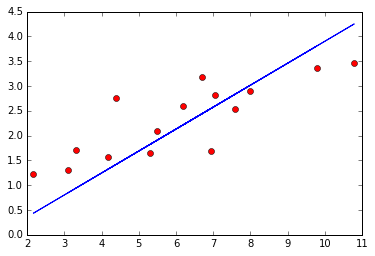

In [9]:
# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.show()

In [10]:
# 保存模型
torch.save(model.state_dict(), './linear.pth')

In [17]:
help(x)

Help on Variable in module torch.autograd.variable object:

class Variable(torch._C._VariableBase)
 |  Wraps a tensor and records the operations applied to it.
 |  
 |  Variable is a thin wrapper around a Tensor object, that also holds
 |  the gradient w.r.t. to it, and a reference to a function that created it.
 |  This reference allows retracing the whole chain of operations that
 |  created the data. If the Variable has been created by the user, its creator
 |  will be ``None`` and we call such objects *leaf* Variables.
 |  
 |  Since autograd only supports scalar valued function differentiation, grad
 |  size always matches the data size. Also, grad is normally only allocated
 |  for leaf variables, and will be always zero otherwise.
 |  
 |  Attributes:
 |      data: Wrapped tensor of any type.
 |      grad: Variable holding the gradient of type and location matching
 |          the ``.data``.  This attribute is lazily allocated and can't
 |          be reassigned.
 |      require

In [16]:
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
x

Variable containing:
 2.9048e-01 -4.5573e-02 -1.0660e-01  ...  -1.6881e+00  7.5227e-01  1.5410e+00
 6.0501e-01  7.0981e-01  6.7301e-02  ...  -1.4636e-01 -3.5438e-02  2.9461e-01
 1.1814e+00  1.5317e+00 -2.3029e-01  ...  -1.6250e-01  8.9886e-01  1.8541e-01
                ...                   ⋱                   ...                
-1.3005e+00 -1.5443e-01 -3.1878e-02  ...   5.4347e-02  1.3440e+00  1.4266e+00
 6.0846e-01  4.7625e-01  1.6940e+00  ...   1.5850e-01 -1.3444e+00 -1.1079e-02
-1.9834e+00  1.0492e+00  1.2114e+00  ...   5.7051e-03  1.3604e+00  5.9990e-01
[torch.FloatTensor of size 64x1000]

In [15]:
x = Variable(torch.randn(4, 5))
x

Variable containing:
 0.2270  1.7872 -1.1285  0.4430 -0.5078
 0.4790 -0.6506  0.8788 -2.1128  0.0298
-0.3644 -0.3018  1.2617  0.4955 -0.3260
-0.0446  0.2773 -0.4059  1.3936 -1.2565
[torch.FloatTensor of size 4x5]